In [1]:
from datasets import load_dataset

dataset = load_dataset("emotion", download_mode="reuse_cache_if_exists")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /Users/Jeff/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
for k in  ['test', 'train', 'validation']:
    print(k) 
    for i in range(5):
        print(dataset[k][i])
    print()

test
{'text': 'im feeling rather rotten so im not very ambitious right now', 'label': 0}
{'text': 'im updating my blog because i feel shitty', 'label': 0}
{'text': 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'label': 0}
{'text': 'i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived', 'label': 1}
{'text': 'i was feeling a little vain when i did this one', 'label': 0}

train
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
{'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 2}
{'text': 'i am feeling grouchy', 'label': 3}

validation
{'text': 'im feeling quite sad and sorry for myself but ill snap out of it soo

In [3]:
all_text = []
all_label = []

for pro in ['train', 'validation', 'test']:

    for k in dataset[pro]:
        
        all_text.append(k['text'])
        all_label.append(k['label'])
    

In [4]:
all_text[:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [5]:
all_label[:5]

[0, 0, 3, 2, 3]

a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

In [6]:
key_to_label={'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5}
label_to_key={0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [7]:
key_to_label.keys()

dict_keys(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [8]:
df = pd.DataFrame({"text": all_text, 'label':all_label})

NameError: name 'pd' is not defined

In [ ]:
df['label_words'] = df['label'].apply(lambda x: label_to_key[x])

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.to_csv('data/emotion.csv',index=False)

# EDA

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('data/emotion.csv')
df.head()

,text,label,label_words
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [11]:
def basic_eda(df, row_limit=5, list_elements_limit=10):
    ### rows and columns
    print('Info : There are {} columns in the dataset'.format(df.shape[1]))
    print('Info : There are {} rows in the dataset'.format(df.shape[0]))
    
    print("==================================================")
    
    ## data types
    print("\nData type information of different columns")
    dtypes_df = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:'dtype', 'index':'column_name'})
    cat_df = dtypes_df[dtypes_df['dtype']=='object']
    num_df = dtypes_df[dtypes_df['dtype']!='object']
    print('Info : There are {} categorical columns'.format(len(cat_df)))
    print('Info : There are {} numerical columns'.format(len(dtypes_df)-len(cat_df)))
    
    if list_elements_limit >= len(cat_df):
        print("Categorical columns : ", list(cat_df['column_name']))
    else:
        print("Categorical columns : ", list(cat_df['column_name'])[:list_elements_limit])
        
    if list_elements_limit >= len(num_df):
        print("Numerical columns : ", list(num_df['column_name']))
    else:
        print("Numerical columns : ", list(num_df['column_name'])[:list_elements_limit])
    
    #dtypes_df['dtype'].value_counts().plot.bar()
    display(dtypes_df.head(row_limit))
    
    print("==================================================")
    print("\nDescription of numerical variables")
    
    #### Describibg numerical columns
    desc_df_num = df[list(num_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_num.head(row_limit))
    
    print("==================================================")
    print("\nDescription of categorical variables")
    
    desc_df_cat = df[list(cat_df['column_name'])].describe().T.reset_index().rename(columns={'index':'column_name'})
    display(desc_df_cat.head(row_limit))
    
    return

In [12]:
basic_eda(df)

Info : There are 3 columns in the dataset
Info : There are 20000 rows in the dataset

Data type information of different columns
Info : There are 2 categorical columns
Info : There are 1 numerical columns
Categorical columns :  ['text', 'label_words']
Numerical columns :  ['label']


,column_name,dtype
0,text,object
1,label,int64
2,label_words,object



Description of numerical variables


,column_name,count,mean,std,min,25%,50%,75%,max
0,label,20000.0,1.56285,1.496684,0.0,0.0,1.0,3.0,5.0



Description of categorical variables


,column_name,count,unique,top,freq
0,text,20000,19948,i will feel as though i am accepted by as well...,2
1,label_words,20000,6,joy,6761


In [13]:
# Quickly check for mising values
total = df.isnull().sum()
total

text           0
label          0
label_words    0
dtype: int64

### Distribution of sentiments in the data

In [ ]:
 
  
# Distribution of sentiments in the data
col = 'label_words'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]

#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
# plt.figure(figsize=(12,8))

# plt.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9);
# # plt.title("Percentage of each emotion")
# plt.show()

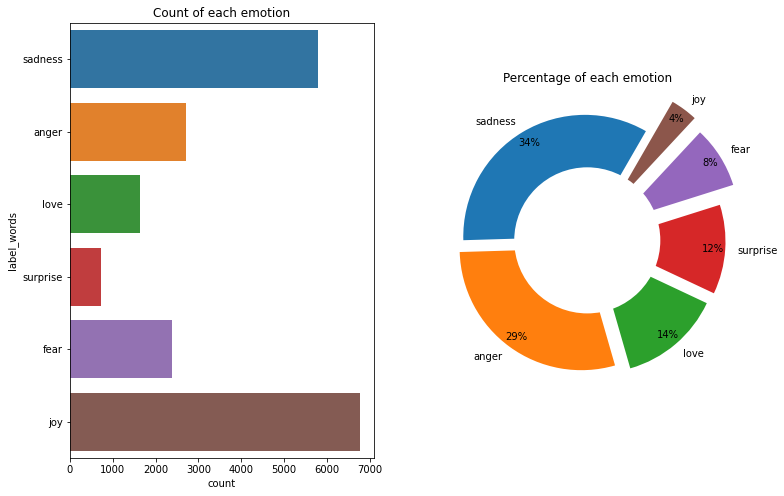

In [19]:
col = 'label_words'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]

#ax.pie(sizes, explode=explode, colors=bo, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

### Distribution of character length and token length overall

In [ ]:
# Distribution of character length and token length overall
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

In [20]:
df['char_length'] = df['text'].apply(lambda x : len(x))
df['token_length'] = df['text'].apply(lambda x : len(x.split(" ")))

/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Jeff/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


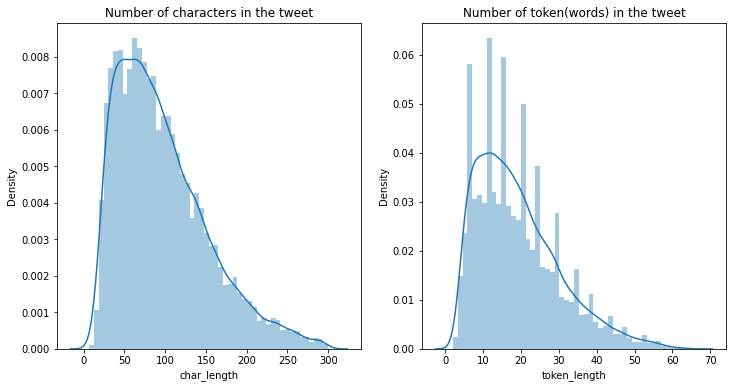

In [21]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.distplot(df['char_length'], ax=ax1)
sns.distplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the tweet')
ax2.set_title('Number of token(words) in the tweet')
plt.show()

### Distribution of character length sentiment-wise [Top 5 sentiments]

In [ ]:
# Distribution of character length sentiment-wise [Top 5 sentiments]
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['label_words'].value_counts().sort_values()[-5:].index.tolist():
    sns.kdeplot(df[df['label_words']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

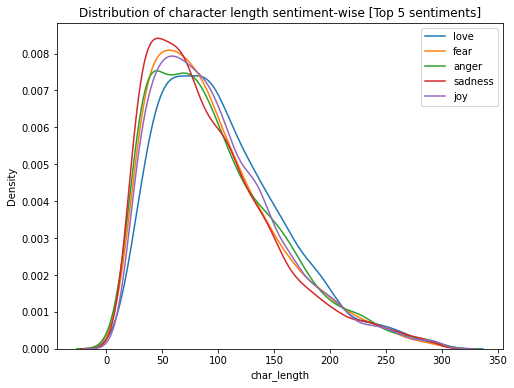

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['label_words'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['label_words']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise [Top 5 sentiments]")
plt.show()

### Distribution of token length sentiment-wise [Top 5 sentiments]

In [ ]:
# Distribution of token length sentiment-wise [Top 5 sentiments]
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['label_words'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['label_words']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

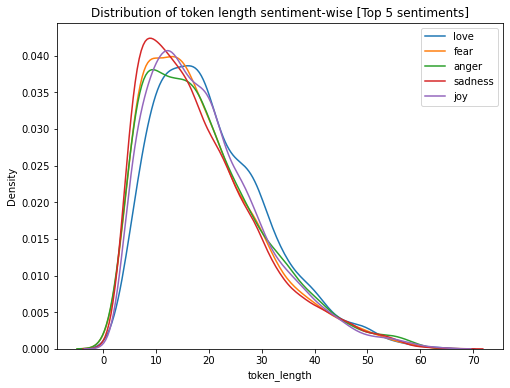

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
for sentiment in df['label_words'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['label_words']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of token length sentiment-wise [Top 5 sentiments]")
plt.show()

### Let's look at the most common character and token length

In [ ]:
# Let's look at the most common character and token lengt
avg_df = df.groupby('label_words').agg({'char_length':'mean', 'token_length':'mean'})

fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

In [24]:
avg_df = df.groupby('label_words').agg({'char_length':'mean', 'token_length':'mean'})

/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_1128/1455811741.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_df.index, rotation = 45)
/var/folders/8b/_p4_5dy97kxdg3xtgxsz0khw0000gn/T/ipykernel_1128/1455811741.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(avg_df.index, rotation = 45)


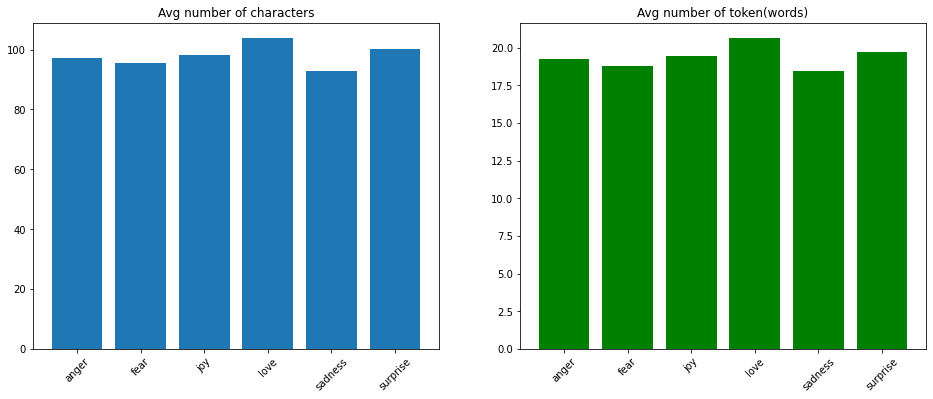

In [25]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.bar(avg_df.index, avg_df['char_length'])
ax2.bar(avg_df.index, avg_df['token_length'], color='green')
ax1.set_title('Avg number of characters')
ax2.set_title('Avg number of token(words)')
ax1.set_xticklabels(avg_df.index, rotation = 45)
ax2.set_xticklabels(avg_df.index, rotation = 45)
plt.show()

`Observations`
- There are 6 different emotions.
- "Sadness" and "Joy" are the most frequent emotions in the dataset.
- Most of the text have around 50 characters.
- The most frequent token length is around 10.
- People having "anger", "fear" and "fear" emotion write smaller text.

# Text Processing

The text is already preprocessed but since we will use it in a website for future predictions, we will code the text preprocessing.

In [26]:
# pip install inflect

In [27]:
# pip install contractions


In [28]:
# Data preparation and text-preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
import inflect
import contractions
from bs4 import BeautifulSoup
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [29]:
#### text preprocessing

def text_preprocessing_platform(df, text_col, remove_stopwords=True):
    
    ## Define functions for individual steps
    # First function is used to denoise text
    def denoise_text(text):
        # Strip html if any. For ex. removing <html>, <p> tags
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        # Replace contractions in the text. For ex. didn't -> did not
        text = contractions.fix(text)
        return text
    
    ## Next step is text-normalization
    
    # Text normalization includes many steps.
    
    # Each function below serves a step.
    
    
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words
    
    
    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words
    
    
    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words
    
    
    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words
    
    
    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('english'):
                new_words.append(word)
        return new_words
    
    
    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems
    
    
    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas
    
    
    ### A wrap-up function for normalization
    def normalize_text(words, remove_stopwords):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        if remove_stopwords:
            words = remove_stopwords(words)
        #words = stem_words(words)
        words = lemmatize_verbs(words)
        return words
    
    # All above functions work on word tokens we need a tokenizer
    
    # Tokenize tweet into words
    def tokenize(text):
        return nltk.word_tokenize(text)
    
    
    # A overall wrap-up function
    def text_prepare(text):
        text = denoise_text(text)
        text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords)])
        return text
    
    # run every-step
    df[text_col] = [text_prepare(x) for x in df[text_col]]
    
    
    # return processed df
    return df

In [30]:
# df = pd.read_csv('data/emotion.csv')


In [31]:
print("Before Text Preprocessing")
display(df.head()[['text']])
processed_df = text_preprocessing_platform(df, 'text', remove_stopwords=False)
print("After Text Preprocessing")
display(processed_df.head()[['text']])


Before Text Preprocessing


,text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy


After Text Preprocessing


,text
0,feel humiliate
1,go feel hopeless damn hopeful around someone c...
2,grab minute post feel greedy wrong
3,ever feel nostalgic fireplace know still property
4,feel grouchy


### Uni-gram Analysis

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict

In [33]:
def print_word_cloud(df, sentiment):

    print("Word cloud of most frequent words for the sentiment : {}".format(sentiment))

    temp_df = df[df['label_words']==sentiment]
    print("Number of Rows : ", len(temp_df))

    corpus = ''
    for text in temp_df.text:
        text = str(text)
        corpus += text
        
    total = 0
    count = defaultdict(lambda: 0)
    for word in corpus.split(" "):
        total += 1
        count[word] += 1
        
    top20pairs = sorted(count.items(), key=lambda kv: kv[1], reverse=True)[:20]
    top20words = [i[0] for i in top20pairs]
    top20freq = [i[1] for i in top20pairs]
    
    xs = np.arange(len(top20words))
    width = 0.5

    fig = plt.figure(figsize=(10,6))                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, top20freq, width, align='center')

    ax.set_xticks(xs)
    
    ax.set_xticklabels(top20words)
    plt.xticks(rotation=45)
    
    
    stopwords = set(STOPWORDS)
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=50,stopwords=stopwords, background_color="white").generate(corpus)
    plt.figure(figsize = (12, 12), facecolor = None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Word cloud of most frequent words for the sentiment : sadness
Number of Rows :  5797


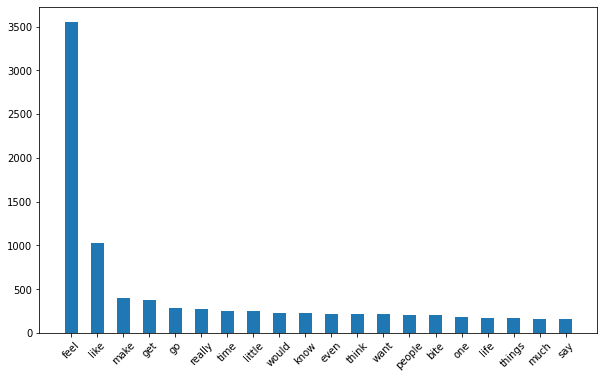

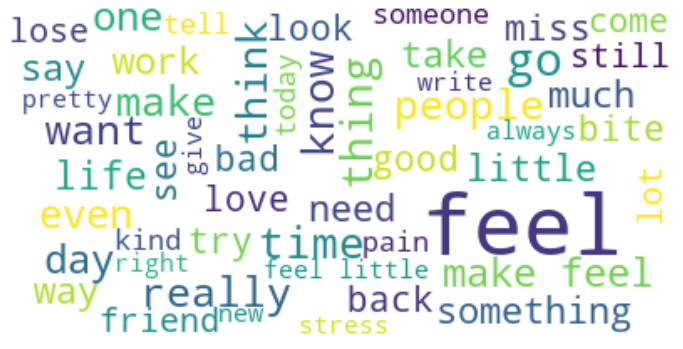

In [34]:
print_word_cloud(df, 'sadness')

In [35]:
# for i in list(key_to_label.keys()):
#     print("'",i,"'")
#     print_word_cloud(df, i)
#     print()
#     print()    
#     print()        

# Model Development

 split into 80% train and 20% test 

In [36]:
df.head()

,text,label,label_words,char_length,token_length
0,feel humiliate,0,sadness,23,4
1,go feel hopeless damn hopeful around someone c...,0,sadness,108,21
2,grab minute post feel greedy wrong,3,anger,48,10
3,ever feel nostalgic fireplace know still property,2,love,92,18
4,feel grouchy,3,anger,20,4


In [37]:
from sklearn.model_selection import train_test_split


In [38]:
processed_df.head()

,text,label,label_words,char_length,token_length
0,feel humiliate,0,sadness,23,4
1,go feel hopeless damn hopeful around someone c...,0,sadness,108,21
2,grab minute post feel greedy wrong,3,anger,48,10
3,ever feel nostalgic fireplace know still property,2,love,92,18
4,feel grouchy,3,anger,20,4


In [39]:
X = processed_df['text'].values
y = processed_df['label'].values



In [40]:
# from sklearn.feature_extraction.text import CountVectorizer

# vec = CountVectorizer()
# X = vec.fit_transform(X)
# vocab = vec.get_feature_names_out()

# X_df = pd.DataFrame(X.todense(), columns=vec.get_feature_names_out())


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()
X_data = tf_vec.fit_transform(X)
# vocab = vec.get_feature_names_out()

# X_df = pd.DataFrame(X.todense(), columns=vec.get_feature_names_out())


In [42]:
key_to_label={'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5}
label_to_key={0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [43]:
list(key_to_label.keys())

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [44]:
labels_name = list(key_to_label.keys())

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2)
# X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.3)


## custom functions

In [ ]:
roc

#### roc

In [46]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

In [47]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [48]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
        '''
        Plots the ROC Curve by using the list of coordinates (tpr and fpr).
        
        Args:
            tpr: The list of TPRs representing each coordinate.
            fpr: The list of FPRs representing each coordinate.
            scatter: When True, the points used on the calculation will be plotted with the line (default = True).
        '''
        if ax == None:
            plt.figure(figsize = (5, 5))
            ax = plt.axes()
        
        if scatter:
            sns.scatterplot(x = fpr, y = tpr, ax = ax)
        sns.lineplot(x = fpr, y = tpr, ax = ax)
        sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
        plt.xlim(-0.05, 1.05)
        plt.ylim(-0.05, 1.05)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")

In [49]:
def make_multiclass_roccurve(clf, clf_proba, clf_name,):
    
    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    classes = clf.classes_

    roc_auc_ovr = {}

    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        df_aux = pd.DataFrame(X_test).copy()
        df_aux['class'] = [1 if y == c else 0 for y in y_test]
        df_aux['prob'] = clf_proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 4, i+1)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title(f"{clf_name}'s ROC Curve OvR of {label_to_key[c]}")

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()

#### confusion matrix

In [50]:
def make_confusionmat(clf_pred, clf_name='None'):
    
    labels = labels_name

    clf_cfm = confusion_matrix(y_test, clf_pred)

    
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(clf_cfm,
                         index =labels, 
                         columns =labels)

    #Plotting the confusion matrix
    plt.figure(figsize=(8,5))

    plt.title(f'{clf_name} tf-idf Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    sns.heatmap(cm_df,annot=True,fmt='g')

    plt.show()
    
    return clf_cfm


In [51]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [52]:
from sklearn.ensemble import RandomForestClassifier

# #learn random forest

random_forest_clf = RandomForestClassifier(random_state=1)

random_forest_predictions = random_forest_clf.fit(X_train, y_train).predict(X_test)

random_forest_acc = accuracy_score(y_test, random_forest_predictions)

print('accuracy of random forest: {}'.format(random_forest_acc))
print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
                                                                       (y_test != random_forest_predictions).sum()))
print()
print("Training set score: {:.3f}".format(random_forest_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(random_forest_clf.score(X_test, y_test)))

accuracy of random forest: 0.87325

Number of mislabeled points out of a total 4000 points : 507

Training set score: 0.997
Test set score: 0.873


In [53]:
random_forest_proba = random_forest_clf.predict_proba(X_test)
print('random_forest_proba', random_forest_proba)

random_forest_proba [[0.91  0.02  0.02  0.03  0.01  0.01 ]
 [0.194 0.01  0.01  0.18  0.596 0.01 ]
 [0.1   0.01  0.05  0.83  0.01  0.   ]
 ...
 [0.95  0.02  0.    0.01  0.02  0.   ]
 [0.88  0.09  0.01  0.    0.01  0.01 ]
 [0.22  0.33  0.4   0.04  0.01  0.   ]]


In [54]:
# from sklearn.ensemble import RandomForestClassifier

# # #learn random forest

# random_forest_clf = RandomForestClassifier(random_state=1)

# random_forest_predictions = random_forest_clf.fit(X_train, y_train).predict(X_test)
# random_forest_acc = accuracy_score(y_test, random_forest_predictions)

# print('accuracy of random forest: {}'.format(random_forest_acc))
# print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
#                                                                        (y_test != random_forest_predictions).sum()))
# print()
# print("Training set score: {:.3f}".format(random_forest_clf.score(X_train, y_train)))
# print("Test set score: {:.3f}".format(random_forest_clf.score(X_test, y_test)))

##### classification report

In [55]:
print(classification_report(y_test, random_forest_predictions, target_names=labels_name))

              precision    recall  f1-score   support

     sadness       0.92      0.91      0.91      1181
         joy       0.87      0.92      0.89      1288
        love       0.85      0.68      0.76       322
       anger       0.86      0.86      0.86       561
        fear       0.84      0.85      0.84       513
    surprise       0.76      0.76      0.76       135

    accuracy                           0.87      4000
   macro avg       0.85      0.83      0.84      4000
weighted avg       0.87      0.87      0.87      4000



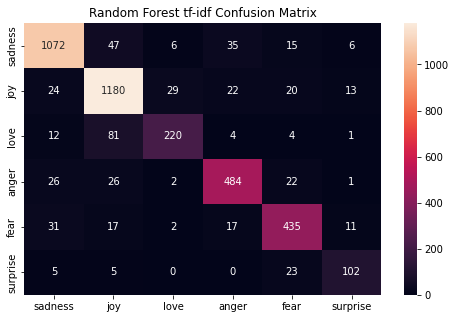

array([[1072,   47,    6,   35,   15,    6],
       [  24, 1180,   29,   22,   20,   13],
       [  12,   81,  220,    4,    4,    1],
       [  26,   26,    2,  484,   22,    1],
       [  31,   17,    2,   17,  435,   11],
       [   5,    5,    0,    0,   23,  102]])

In [56]:
make_confusionmat(random_forest_predictions, 'Random Forest')

In [ ]:
sadness, joy, love, anger, fear, and surprise

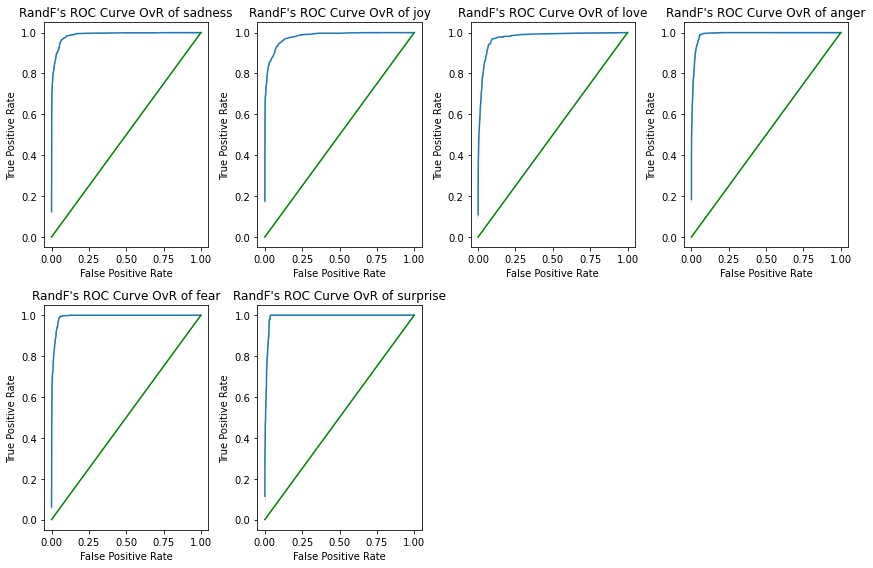

In [125]:

# # calculate roc_auc_score
make_multiclass_roccurve(random_forest_clf, random_forest_proba, clf_name='RandF')

In [69]:
print("\nRandom Forest")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
rf_roc_auc_multiclass = roc_auc_score_multiclass(y_test, random_forest_predictions, lbk=label_to_key)
print(rf_roc_auc_multiclass)


Random Forest
{'sadness': 0.9319853934439541, 'joy': 0.9169421370556683, 'love': 0.803385352159194, 'anger': 0.9180764163372859, 'fear': 0.9176655469491949, 'surprise': 0.8665001934885622}


In [131]:
rf_roc_auc_multiclass

{'sadness': 0.9325577260525139,
 'joy': 0.9144856899828618,
 'love': 0.7353067459334489,
 'anger': 0.8865744400527009,
 'fear': 0.8872922996956604,
 'surprise': 0.7643656130666842}

In [133]:
max(rf_roc_auc_multiclass.values())

0.9325577260525139

In [134]:
0.9325*100

93.25

In [63]:
# roc = {label: [] for label in labels_name}
# for label in labels_name:
# #     print(roc)
# #     break
# #     random_forest_clf.fit(train_set_dataframe, train_class == label)
# #     predictions_proba = selected_classifier.predict_proba(test_set_dataframe)
#     roc[label] += roc_auc_score(label, random_forest_proba[:,1])

### KNN

In [57]:
#learn neighbor matrix

from sklearn.neighbors import KNeighborsClassifier

# knn_clf = KNeighborsClassifier(algorithm='ball_tree')
knn_clf = KNeighborsClassifier()

knn_predictions = knn_clf.fit(X_train, y_train).predict(X_test)
knn_acc = accuracy_score(y_test, knn_predictions)

print('accuracy of KNeighborsClassifier: {}'.format(knn_acc))
print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
                                                                       (y_test != knn_predictions).sum()))
print()
print("Training set score: {:.3f}".format(knn_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_clf.score(X_test, y_test)))

accuracy of KNeighborsClassifier: 0.78075

Number of mislabeled points out of a total 4000 points : 877

Training set score: 0.858
Test set score: 0.781


In [58]:
knn_proba = knn_clf.predict_proba(X_test)
print('knn_proba', knn_proba)

knn_proba [[0.8 0.2 0.  0.  0.  0. ]
 [0.4 0.  0.  0.  0.6 0. ]
 [0.2 0.  0.2 0.6 0.  0. ]
 ...
 [0.8 0.2 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]]


##### classification report

In [59]:
print(classification_report(y_test, knn_predictions, target_names=labels_name))

              precision    recall  f1-score   support

     sadness       0.75      0.89      0.81      1181
         joy       0.79      0.86      0.82      1288
        love       0.74      0.46      0.57       322
       anger       0.81      0.73      0.77       561
        fear       0.86      0.67      0.76       513
    surprise       0.70      0.49      0.58       135

    accuracy                           0.78      4000
   macro avg       0.78      0.68      0.72      4000
weighted avg       0.78      0.78      0.77      4000



confusion matrix

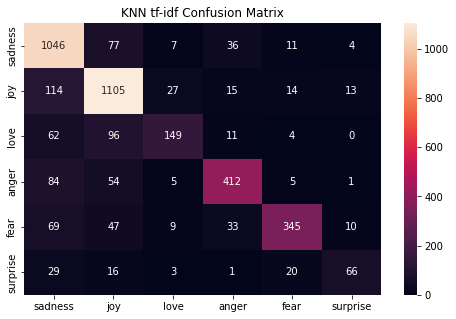

array([[1046,   77,    7,   36,   11,    4],
       [ 114, 1105,   27,   15,   14,   13],
       [  62,   96,  149,   11,    4,    0],
       [  84,   54,    5,  412,    5,    1],
       [  69,   47,    9,   33,  345,   10],
       [  29,   16,    3,    1,   20,   66]])

In [60]:
make_confusionmat(knn_predictions, 'KNN')

#### roc

In [139]:
print("\nKNN")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
knn_roc_auc_multiclass = roc_auc_score_multiclass(y_test, knn_predictions, lbk=label_to_key)
print(knn_roc_auc_multiclass)


KNN
{'sadness': 0.8761542871063063, 'joy': 0.8662282417655457, 'love': 0.7459623482784246, 'anger': 0.8413175230566534, 'fear': 0.836096800911319, 'surprise': 0.7171653560554619}


In [140]:
max(knn_roc_auc_multiclass.values())

0.8761542871063063

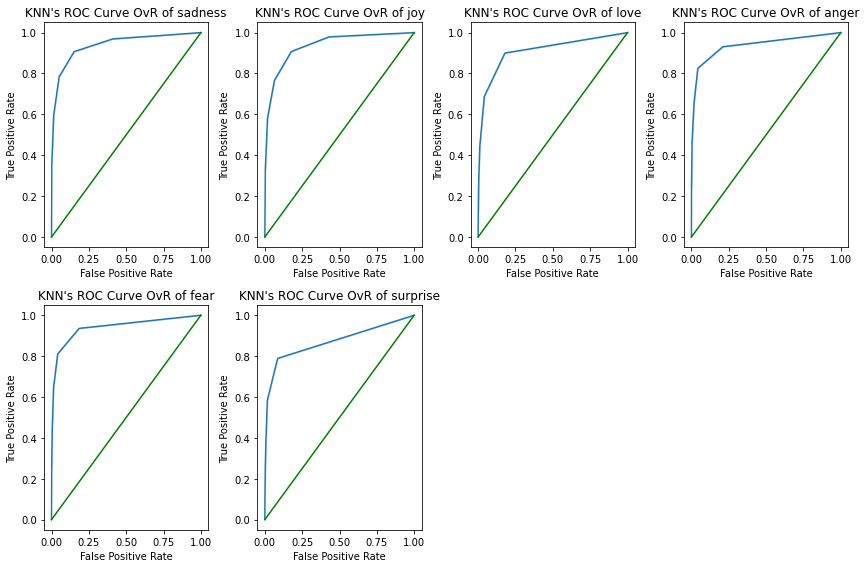

In [129]:
# # calculate roc_auc_score
make_multiclass_roccurve(knn_clf, knn_proba, clf_name='KNN')

### SVM

In [61]:
from sklearn.svm import SVC

#learn random forest

SVC_clf = SVC(random_state=1)

SVC_predictions = SVC_clf.fit(X_train, y_train).predict(X_test)
SVC_acc = accuracy_score(y_test, SVC_predictions)

print('accuracy of Support Vector Machine: {}'.format(SVC_acc))
print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
                                                                       (y_test != SVC_predictions).sum()))
print()
print("Training set score: {:.3f}".format(SVC_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(SVC_clf.score(X_test, y_test)))

accuracy of Support Vector Machine: 0.83775

Number of mislabeled points out of a total 4000 points : 649

Training set score: 0.987
Test set score: 0.838


##### classification report

In [62]:
print(classification_report(y_test, SVC_predictions, target_names=labels_name))

              precision    recall  f1-score   support

     sadness       0.88      0.92      0.90      1181
         joy       0.78      0.95      0.85      1288
        love       0.86      0.52      0.65       322
       anger       0.88      0.79      0.83       561
        fear       0.87      0.73      0.79       513
    surprise       0.83      0.50      0.63       135

    accuracy                           0.84      4000
   macro avg       0.85      0.73      0.78      4000
weighted avg       0.84      0.84      0.83      4000



##### Confusion matrix

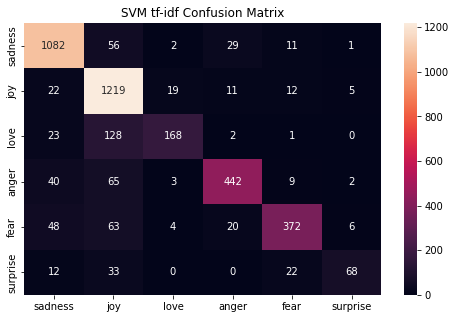

array([[1082,   56,    2,   29,   11,    1],
       [  22, 1219,   19,   11,   12,    5],
       [  23,  128,  168,    2,    1,    0],
       [  40,   65,    3,  442,    9,    2],
       [  48,   63,    4,   20,  372,    6],
       [  12,   33,    0,    0,   22,   68]])

In [63]:
make_confusionmat(SVC_predictions, 'SVM')

In [141]:
print("\svm")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
svc_roc_auc_multiclass = roc_auc_score_multiclass(y_test, SVC_predictions, lbk=label_to_key)
print(svc_roc_auc_multiclass)

\svm
{'sadness': 0.9325577260525139, 'joy': 0.9144856899828618, 'love': 0.7353067459334489, 'anger': 0.8865744400527009, 'fear': 0.8872922996956604, 'surprise': 0.7643656130666842}


In [142]:
max(svc_roc_auc_multiclass.values())

0.9325577260525139

In [90]:
svc_proba = SVC_clf.predict_proba(X_test)
print('svc_proba', svc_proba)

svc_proba [[8.75831402e-01 4.88867565e-02 1.22565100e-02 3.81474010e-02
  2.02716109e-02 4.60632010e-03]
 [3.11654451e-05 9.97180971e-01 1.83755215e-03 2.22614313e-04
  3.06320916e-04 4.21376481e-04]
 [3.48107597e-05 9.97176031e-01 1.99640274e-03 2.47655770e-04
  3.29617173e-04 2.15482969e-04]
 ...
 [1.28830886e-02 2.84680849e-03 5.10262736e-04 9.76411338e-04
  9.81276757e-01 1.50667194e-03]
 [2.44691563e-04 8.79768039e-01 1.19850813e-01 3.39679160e-05
  1.04156198e-05 9.20734445e-05]
 [9.78611390e-01 5.14811791e-03 4.14619647e-03 6.72595438e-03
  4.49355410e-03 8.74786643e-04]]


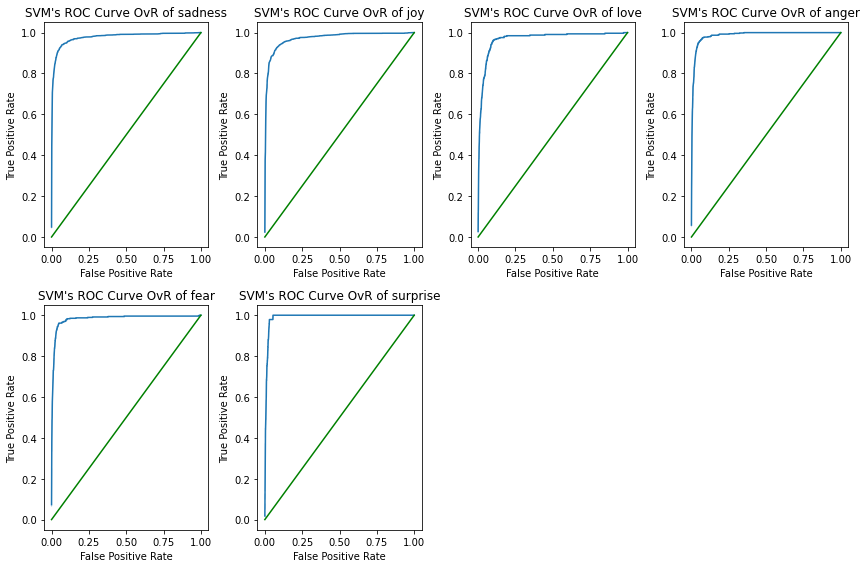

In [130]:
make_multiclass_roccurve(SVC_clf, svc_proba, clf_name='SVM')

In [101]:
len(classes)

6

In [109]:
# # Plots the Probability Distributions and the ROC Curves One vs Rest
# plt.figure(figsize = (12, 8))
# bins = [i/20 for i in range(20)] + [1]
# classes = SVC_clf.classes_

# roc_auc_ovr = {}

# for i in range(len(classes)):
#     # Gets the class
#     c = classes[i]
    
#     # Prepares an auxiliar dataframe to help with the plots
#     df_aux = pd.DataFrame(X_test).copy()
#     df_aux['class'] = [1 if y == c else 0 for y in y_test]
#     df_aux['prob'] = random_forest_proba[:, i]
#     df_aux = df_aux.reset_index(drop = True)
    
#     # Calculates the ROC Coordinates and plots the ROC Curves
#     ax_bottom = plt.subplot(2, 4, i+1)
# #     ax_bottom = plt.subplot(2, 4, i+4)
#     tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
#     ax_bottom.set_title(f"SVM ROC Curve OvR of {label_to_key[c]}")
    
#     # Calculates the ROC AUC OvR
#     roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
# plt.tight_layout()

# roc for all.

In [ ]:
# plt.
#create ROC curve
plt.plot(rndf_fpr,rndf_tpr, label="Random forest (AUC = "+ str(roc_auc_score_RNDF)[:4]+')')

plt.plot(svm_fpr,svm_tpr,  label="Support Vector Machines (AUC = "+ str(roc_auc_score_svm)[:4]+')')
plt.plot(knn_fpr,knn_tpr,  label="k- Nearest Neighbor (AUC = "+ str(roc_auc_score_knn)[:4]+')')

plt.title('Comparison of ROC curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### SAVE model

In [ ]:
import joblib

joblib.dump(tf_vec, "deploy/models/count_vectorizer.pkl")
joblib.dump(random_forest_clf, "deploy/models/randomf.pkl")
# joblib.dump(encodera, "deploy/save_models/labelencoder.pkl")


In [ ]:
#### text preprocessing

## Define functions for individual steps
# First function is used to denoise text
def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Replace contractions in the text. For ex. didn't -> did not
    text = contractions.fix(text)
    return text

## Next step is text-normalization

# Text normalization includes many steps.

# Each function below serves a step.


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


### A wrap-up function for normalization
def normalize_text(words, remove_stopwords_):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    if remove_stopwords_:
        words = remove_stopwords(words)
    #words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

# All above functions work on word tokens we need a tokenizer

# Tokenize tweet into words
def tokenize(text):
    return nltk.word_tokenize(text)


# A overall wrap-up function
def text_prepare(text,remove_stopwords_=True):
    text = denoise_text(text)
    text = ' '.join([x for x in normalize_text(tokenize(text), remove_stopwords_)])
    return text

key_to_label={'sadness':0, 'joy':1, 'love':2, 'anger':3, 'fear':4, 'surprise':5}
label_to_key={0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [ ]:
import numpy

In [ ]:
# text = 'i feel so sad now.'
text = 'ADD CONFIDENCE ON YOUR PREDICTION'

In [ ]:
processed_text = text_prepare(text, )
processed_text

In [ ]:
vec_mat = vec.transform([processed_text])

In [ ]:
pred = random_forest_clf.predict(vec_mat)
pred_prob = random_forest_clf.predict_proba(vec_mat)

print('result: ', label_to_key[pred.item()], ' at a degree of ', max(pred_prob[0]), '%')